In [2]:
# Initial Setups and Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp
import scipy.signal as signal
import scipy.optimize as optimise

pd.plotting.register_matplotlib_converters()

plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = "Ubuntu Mono"  

In [3]:
dataset = pd.read_csv('dataset.csv')

time = dataset['time']
velocity = dataset['velocity']

w = np.linspace(0.1, 10, 1000)

In [4]:
periodogram = signal.lombscargle(time, velocity, w, normalize=True, precenter=True)

wdom = w[np.argmax(periodogram)]

timeperiod =  2 * np.pi / wdom

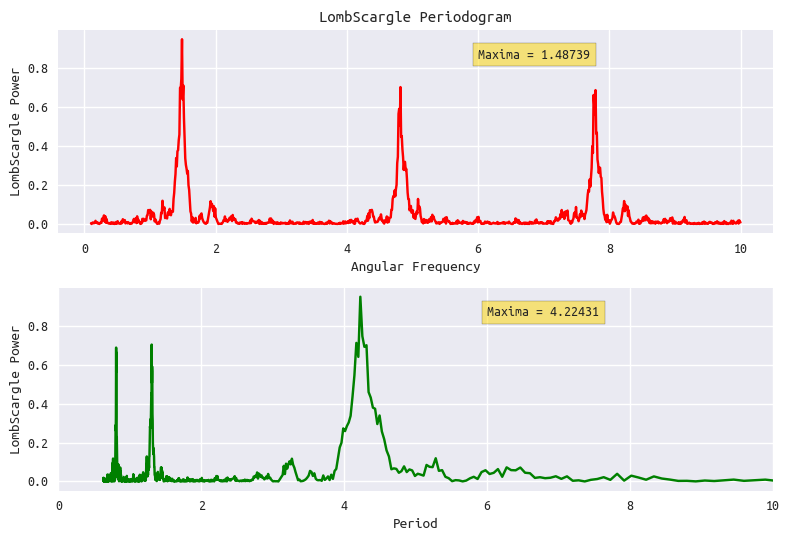

In [5]:
plt.subplot(211)

plt.plot(w, periodogram, c='r')
plt.xlabel("Angular Frequency")
plt.ylabel("LombScargle Power")
plt.title("LombScargle Periodogram")
plt.text(6,0.85,'Maxima = {:.5f}'.format(wdom), bbox = dict(facecolor = 'gold', alpha = 0.5))


plt.subplot(212)

plt.plot(2 * np.pi / w, periodogram, color='g')
plt.xlim(0, 10)
plt.xlabel("Period")
plt.ylabel("LombScargle Power")
plt.text(6,0.85,'Maxima = {:.5f}'.format(timeperiod),bbox = dict(facecolor = 'gold', alpha = 0.5))

plt.tight_layout()

In [6]:
def folding(array,timeperiod):
    """Returns the folded time array"""
    
    tarray = []
    
    for x in array:
        if x < timeperiod:
            tarray.append(x)
        else:
            while x > timeperiod:
                x -= timeperiod
            tarray.append(x)
            
    return tarray

In [7]:
time = [x - time.values[0] for x in time.values]
tfolded = folding(time, timeperiod) 

(-80.0, 80.0)

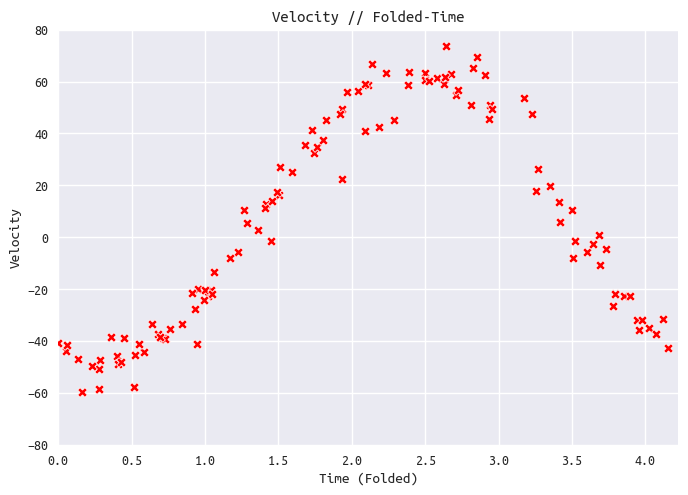

In [8]:
sns.scatterplot(x = tfolded,y = velocity,marker = "X",color = 'r')

plt.title('Velocity // Folded-Time')
plt.xlabel('Time (Folded)')
plt.ylabel('Velocity')

plt.xlim(0,timeperiod)
plt.ylim(-80,80)

## Equation

In [9]:
# Data

j = 1.396
x = -10
p = timeperiod * 86400
a = 3131006.710264267
e = 0.013

# Sine - Wave

th      = np.linspace(0, 4 * np.pi, 1000)
semiamp = 2 * np.pi * a * np.sin(j) / (p * np.sqrt(1 - e ** 2))
v       = semiamp * (np.cos(1*(th + x)) + e * np.cos(x))  

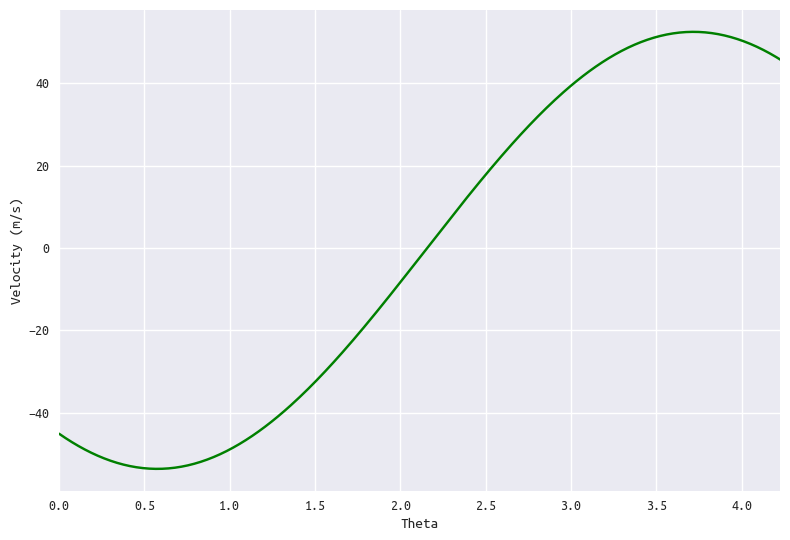

In [10]:
# Plotting the equation
plt.plot(th, v, c='green')

plt.xlabel('Theta')
plt.ylabel('Velocity (m/s)')

plt.xlim(0,timeperiod)

plt.tight_layout()

(0.0, 4.2243099279039)

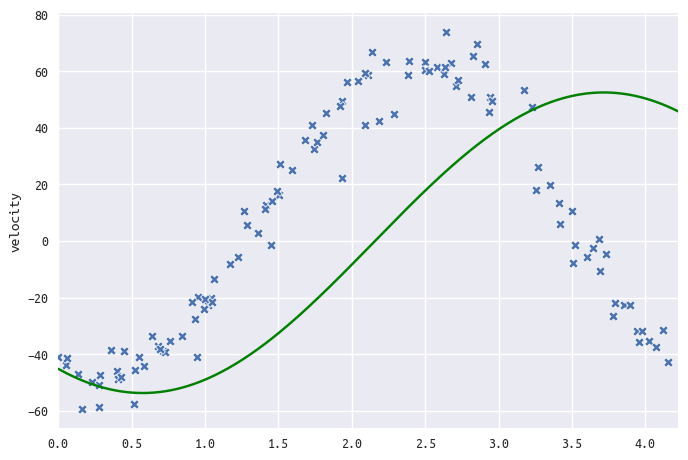

In [11]:
# Superimposing

sns.scatterplot(x = tfolded,y = velocity, marker = 'X')

plt.plot(th, v, c = 'g')
plt.xlim(0, timeperiod)

## Least Square Fit

In [12]:
# defining the function

def f(x,a,b,c):
    return a * np.sin (x + c) + b

In [13]:
xdata = tfolded
ydata = velocity

In [14]:
predict, pcov = optimise.curve_fit(f,xdata,ydata)

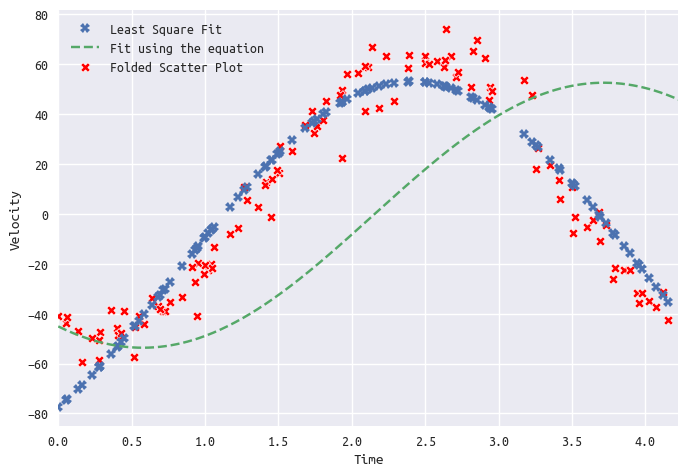

In [15]:
plt.plot(xdata, f(xdata, *predict),'X', label = "Least Square Fit") 

sns.scatterplot(x = xdata, y = velocity, marker = "X", color = 'r', label = "Folded Scatter Plot")

plt.plot(th, v, '--', label = 'Fit using the equation')

plt.xlim(0, timeperiod)

plt.xlabel('Time')
plt.ylabel('Velocity')


plt.legend();

$$
V = \frac{2\pi a * \sin{i}}{P \sqrt{1-e^2}} [Cos(\theta+\omega) + e Cos(\omega)]
$$

In [16]:
i = 1
P = timeperiod * 86400
thdata = np.linspace(0, 4 * np.pi, 1000)

In [17]:
def vel(th,e, w, a):
    return ((2 * np.pi * a * np.sin(i))/(P * np.sqrt(1 - e**2))) * (np.cos(th + w) + e*np.cos(w))

In [18]:
e0 = 0.88
w0 = 2.23234
a0 = 175798129.9
popt, pcov = optimise.curve_fit(vel,thdata, v,p0=(e0,w0,a0))

In [19]:
f"e = {popt[0]}  w = {popt[1]} a = {popt[2]}"

'e = 0.01299999999999999  w = 2.566370614359173 a = 3664174.311343284'

In [20]:
e = popt[0]
w = popt[1]
a = popt[2]
(2 * np.pi * a * np.sin(i)) / (P * np.sqrt(1 - e**2))

53.083839093067915

In [21]:
th_,e_,w_,a_,i_,P_ = sp.symbols(r'\theta e w a i P') 
((2 * sp.pi * a_ * sp.sin(i_))/(P_ * sp.sqrt(1 - e_**2))) * (sp.cos(th_ + w_) + e_*sp.cos(w_))

2*pi*a*(e*cos(w) + cos(\theta + w))*sin(i)/(P*sqrt(1 - e**2))

In [22]:
def vv(th):
    return ((2 * np.pi * a * np.sin(i))/(P * np.sqrt(1 - e**2))) * (np.cos(th + w) + e*np.cos(w))    

(0.0, 4.2243099279039)

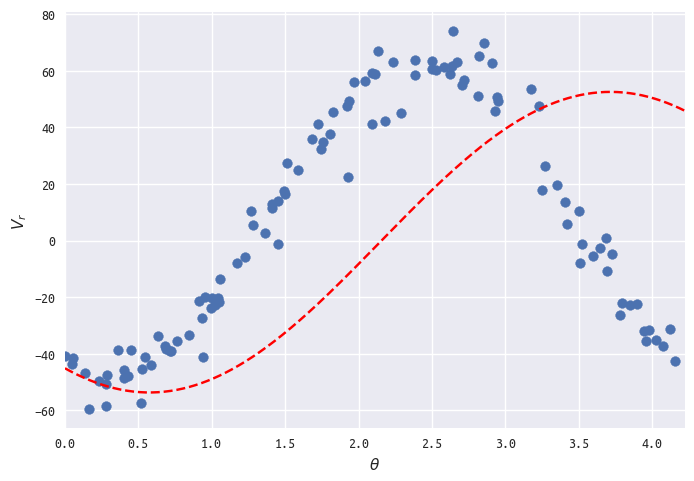

In [27]:
th = 1/wdom * np.linspace(0,4*np.pi,1000)
plt.plot(th,vv(th),'r--')
plt.scatter(xdata,velocity)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$V_r$')
plt.xlim(0,timeperiod)

In [24]:
np.sqrt(np.diag(pcov))

array([1.29393123e-17, 1.53542699e-17, 5.62513983e-11])